<a href="https://colab.research.google.com/github/Tadamiao/Guided-Project/blob/main/Stackoverflow_question_over_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Activate R
%load_ext rpy2.ipython

In [ ]:
#Install and Load
%%R
install.packages("readr")
install.packages("dplyr")
library(readr)
library(dplyr)

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp5ZFr9J/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp5ZFr9J/downloaded_packages’



In [15]:
#Load data (https://stackoverflow.com/questions/59746036/how-to-read-data-from-google-drive-using-r-in-colab)
%%R
by_tag_year = read.csv("by_tag_year.csv")
head(by_tag_year)

  year           tag number year_total
1 2008     .htaccess     54      58390
2 2008          .net   5910      58390
3 2008      .net-2.0    289      58390
4 2008      .net-3.5    319      58390
5 2008      .net-4.0      6      58390
6 2008 .net-assembly      3      58390


In [17]:
#Add fraction column
%%R
bty_fraction <- by_tag_year %>%
mutate(fraction = number/year_total)
head(bty_fraction)

  year           tag number year_total     fraction
1 2008     .htaccess     54      58390 9.248159e-04
2 2008          .net   5910      58390 1.012160e-01
3 2008      .net-2.0    289      58390 4.949478e-03
4 2008      .net-3.5    319      58390 5.463264e-03
5 2008      .net-4.0      6      58390 1.027573e-04
6 2008 .net-assembly      3      58390 5.137866e-05


In [20]:
#Growth or R?
#Filter by R tag
%%R
r_over_time <- bty_fraction %>%
filter(tag == "r")
head(r_over_time)

  year tag number year_total     fraction
1 2008   r      8      58390 0.0001370098
2 2009   r    524     343868 0.0015238405
3 2010   r   2270     694391 0.0032690516
4 2011   r   5845    1200551 0.0048685978
5 2012   r  12221    1645404 0.0074273552
6 2013   r  22329    2060473 0.0108368321


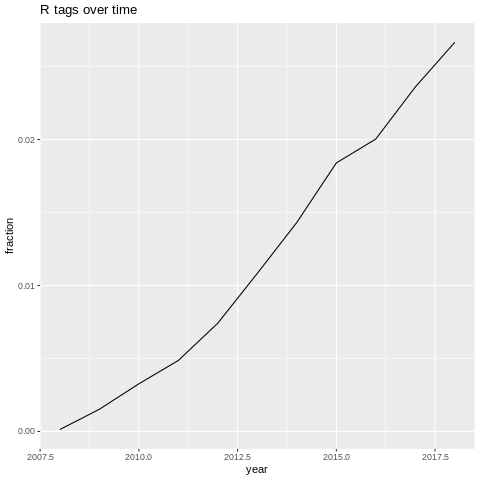

In [27]:
#Plot over years for R tag
%%R
library(ggplot2)
ggplot(r_over_time, aes(x=year, y=fraction)) +
geom_line()+
labs(title= "R tags over time")

In [ ]:
#Popularity of R packages overtime
#Filter by tags
%%R
r_tags <- c("r","dplyr", "ggplot2")
r_tags_overtime <- bty_fraction %>%
filter(tag %in% r_tags)
print(r_tags_overtime)

In [ ]:
#Plot R packages overtime
%%R
ggplot(r_tags_overtime , aes(x=year, y=fraction, col=tag))+
geom_line() +
labs(title= "R packages popularity overtime")

In [38]:
#Sorted tags
%%R
sorted_tag <-by_tag_year %>%
group_by(tag) %>%
summarize(tag_total= sum(number)) %>%
arrange(desc(tag_total))

head(sorted_tag)

# A tibble: 6 × 2
  tag        tag_total
  <chr>          <int>
1 javascript   1632049
2 java         1425961
3 c#           1217450
4 php          1204291
5 android      1110261
6 python        970768


In [41]:
#Most popular tag
%%R
pop_tags <- head(sorted_tag$tag)

by_tag_subset <- bty_fraction %>%
filter(tag %in% pop_tags)

print(by_tag_subset)

   year        tag number year_total     fraction
1  2008    android     38      58390 0.0006507964
2  2008         c#   7473      58390 0.1279842439
3  2008       java   4315      58390 0.0738996403
4  2008 javascript   2736      58390 0.0468573386
5  2008        php   2254      58390 0.0386025004
6  2008     python   2080      58390 0.0356225381
7  2009    android   1991     343868 0.0057900124
8  2009         c#  46044     343868 0.1339002175
9  2009       java  24023     343868 0.0698611095
10 2009 javascript  18722     343868 0.0544453104
11 2009        php  20472     343868 0.0595344725
12 2009     python  12906     343868 0.0375318436
13 2010    android  27280     694391 0.0392862235
14 2010         c#  75501     694391 0.1087298078
15 2010       java  54519     694391 0.0785134024
16 2010 javascript  43407     694391 0.0625108908
17 2010        php  51790     694391 0.0745833399
18 2010     python  27098     694391 0.0390241233
19 2011    android  86987    1200551 0.0724558973


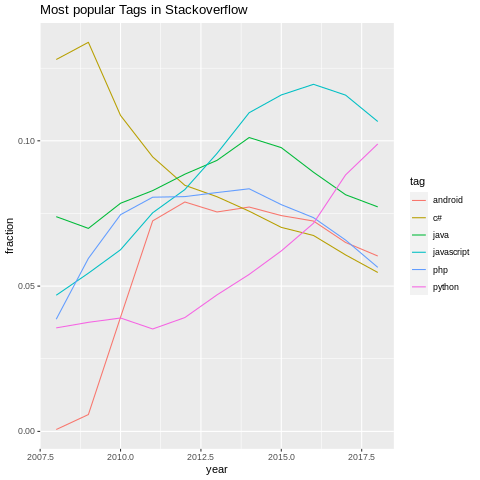

In [43]:
#Plot most popular tag
%%R
ggplot(by_tag_subset, aes(x=year, y=fraction, col=tag)) +
geom_line()+
labs(title= "Most popular Tags in Stackoverflow")

In [46]:
#Popularity of phone
%%R
p_tag <- c("ios", "android", "windows-phone")

p_tag_subset <- bty_fraction %>%
filter(tag %in% p_tag)

print(p_tag_subset)

   year           tag number year_total     fraction
1  2008       android     38      58390 6.507964e-04
2  2008           ios     95      58390 1.626991e-03
3  2008 windows-phone      1      58390 1.712622e-05
4  2009       android   1991     343868 5.790012e-03
5  2009           ios    615     343868 1.788477e-03
6  2010       android  27280     694391 3.928622e-02
7  2010           ios   3748     694391 5.397535e-03
8  2010 windows-phone     47     694391 6.768521e-05
9  2011       android  86987    1200551 7.245590e-02
10 2011           ios  33214    1200551 2.766563e-02
11 2011 windows-phone    171    1200551 1.424346e-04
12 2012       android 129903    1645404 7.894900e-02
13 2012           ios  71023    1645404 4.316448e-02
14 2012 windows-phone    726    1645404 4.412290e-04
15 2013       android 155597    2060473 7.551519e-02
16 2013           ios  82191    2060473 3.988938e-02
17 2013 windows-phone   2229    2060473 1.081790e-03
18 2014       android 167136    2164701 7.7209

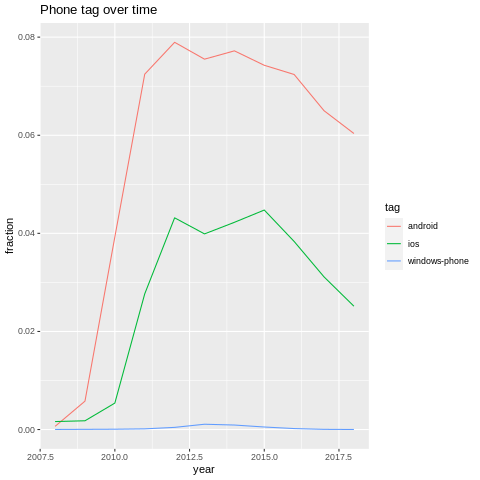

In [47]:
#Plot phone tags overtime
%%R
ggplot(p_tag_subset, aes(x=year, y=fraction, col=tag))+
geom_line()+
labs(title= "Phone tag over time")